<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-16 11:47:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  68.8MB/s    in 2.9s    

2025-05-16 11:47:51 (68.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 189.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 199.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 196.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 181.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 166.0 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [8]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [9]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


#### Demo 3: Group Data by Age


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


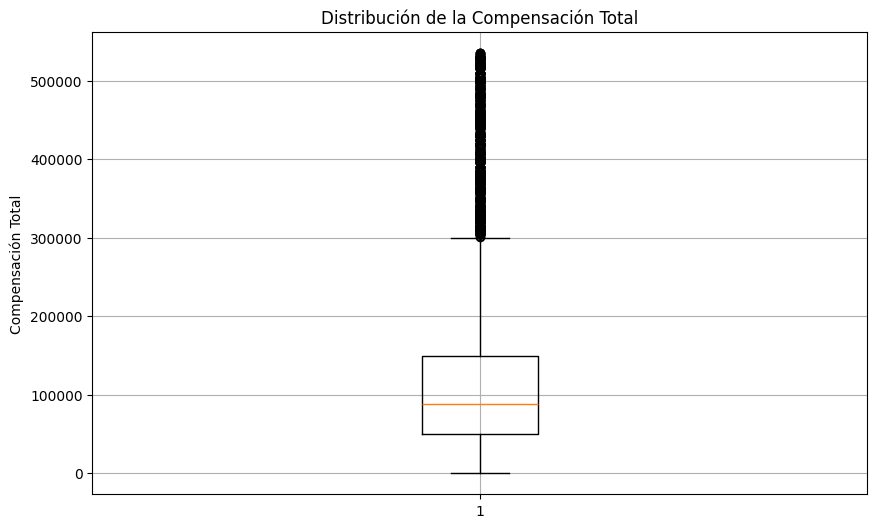

In [14]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]
new_df.head()

plt.figure(figsize=(10,6))
plt.boxplot(new_df["CompTotal"])
plt.title("Distribución de la Compensación Total")
plt.ylabel("Compensación Total")
plt.grid(True)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


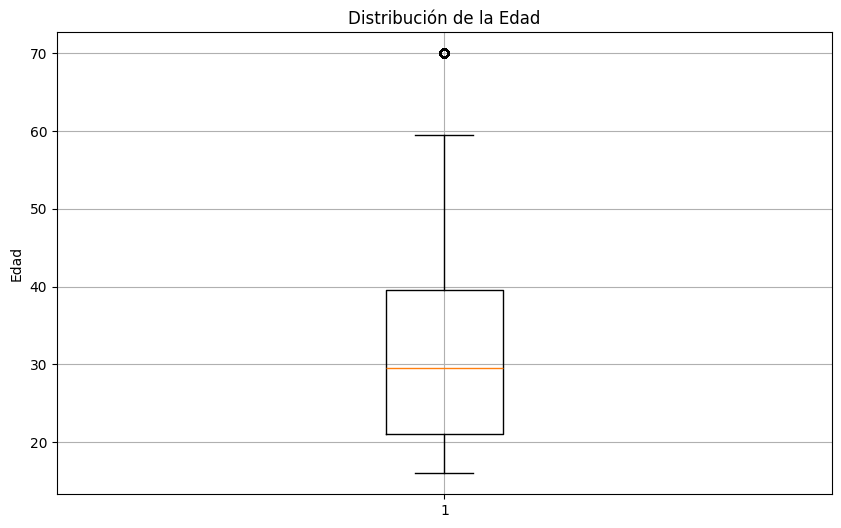

In [24]:
QUERY = """
SELECT Age FROM main WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)

plt.figure(figsize=(10,6))
plt.boxplot(df['AgeNumeric'].dropna().tolist())
plt.title("Distribución de la Edad")
plt.ylabel("Edad")
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [28]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_299/2548717053.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CompTotal", y="Age", data=new_df, palette="Set3")


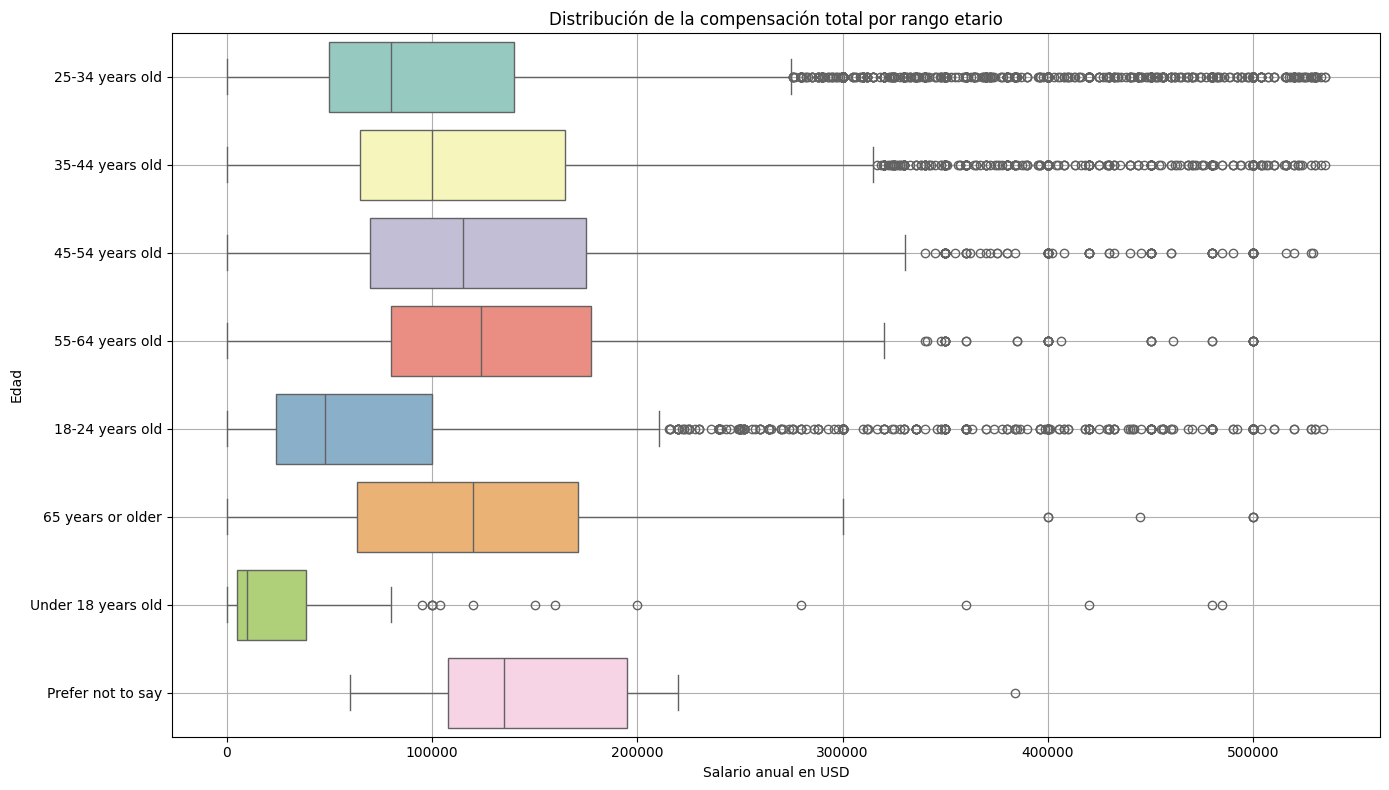

In [29]:
QUERY = """
SELECT Age, CompTotal FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]
new_df.head()

plt.figure(figsize=(14, 8))
sns.boxplot(x="CompTotal", y="Age", data=new_df, palette="Set3")
plt.title("Distribución de la compensación total por rango etario")
plt.xlabel("Salario anual en USD")
plt.ylabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_299/1408662429.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["JobSatPoints_6"] = pd.cut(new_df["JobSatPoints_6"], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_299/1408662429.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CompTotal", y="JobSatPoints_6", data=new_df, palette="Set3")


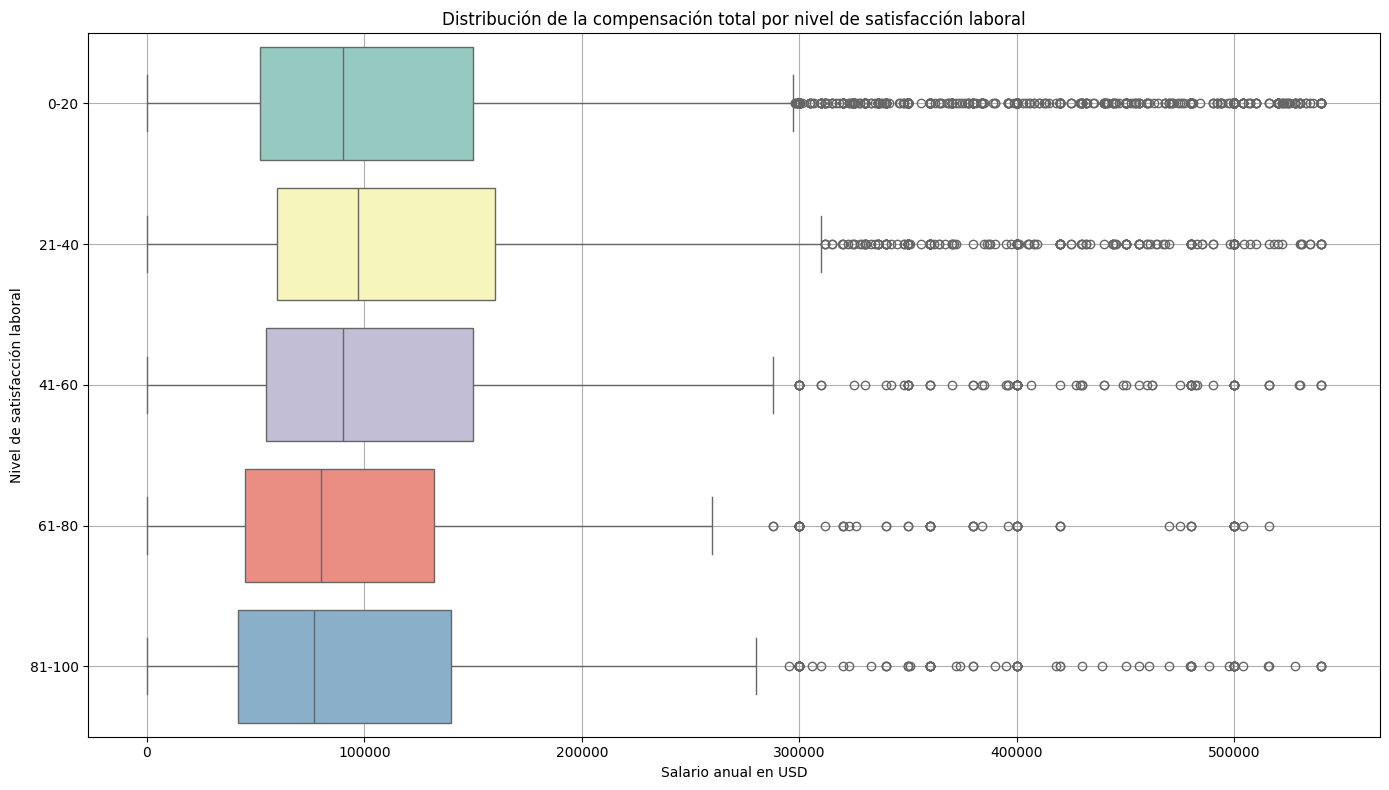

In [63]:
QUERY = """
SELECT JobSatPoints_6, CompTotal FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]
new_df.head()

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
new_df["JobSatPoints_6"] = pd.cut(new_df["JobSatPoints_6"], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(14, 8))
sns.boxplot(x="CompTotal", y="JobSatPoints_6", data=new_df, palette="Set3")
plt.title("Distribución de la compensación total por nivel de satisfacción laboral")
plt.xlabel("Salario anual en USD")
plt.ylabel("Nivel de satisfacción laboral")
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_299/2902581527.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ConvertedCompYearly", y="DevType", data=new_df, palette="Set3")


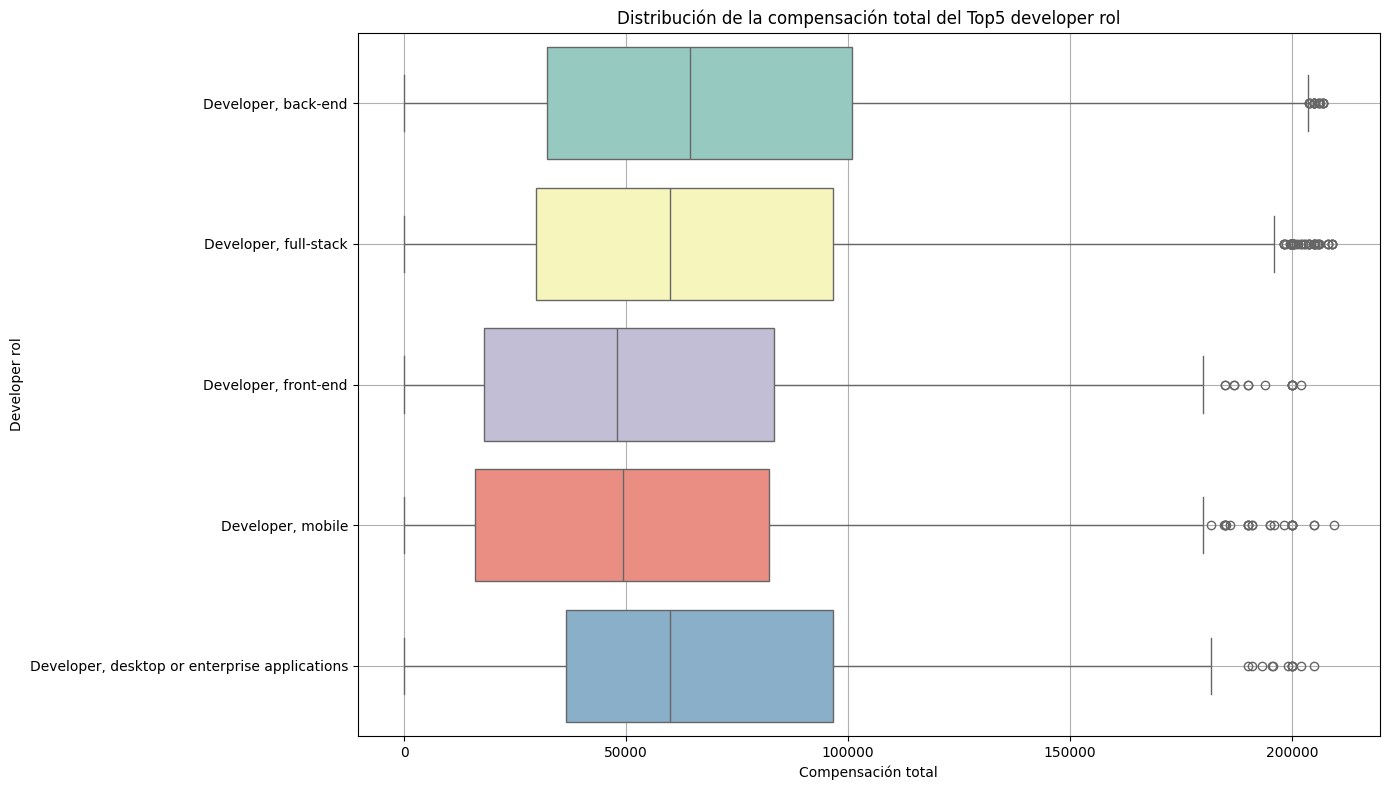

In [49]:
QUERY = """
SELECT DevType, ConvertedCompYearly FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

top5_devtypes = df['DevType'].value_counts().head(5).index
df = df[df['DevType'].isin(top5_devtypes)]

Q1 = df["ConvertedCompYearly"].quantile(0.25)
Q3 = df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["ConvertedCompYearly"] >= limite_inferior) & (df["ConvertedCompYearly"] <= limite_superior)]

plt.figure(figsize=(14, 8))
sns.boxplot(x="ConvertedCompYearly", y="DevType", data=new_df, palette="Set3")
plt.title("Distribución de la compensación total del Top5 developer rol")
plt.xlabel("Compensación total")
plt.ylabel("Developer rol")
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_299/935933892.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CompTotal", y="Country", data=new_df, palette="Set3")


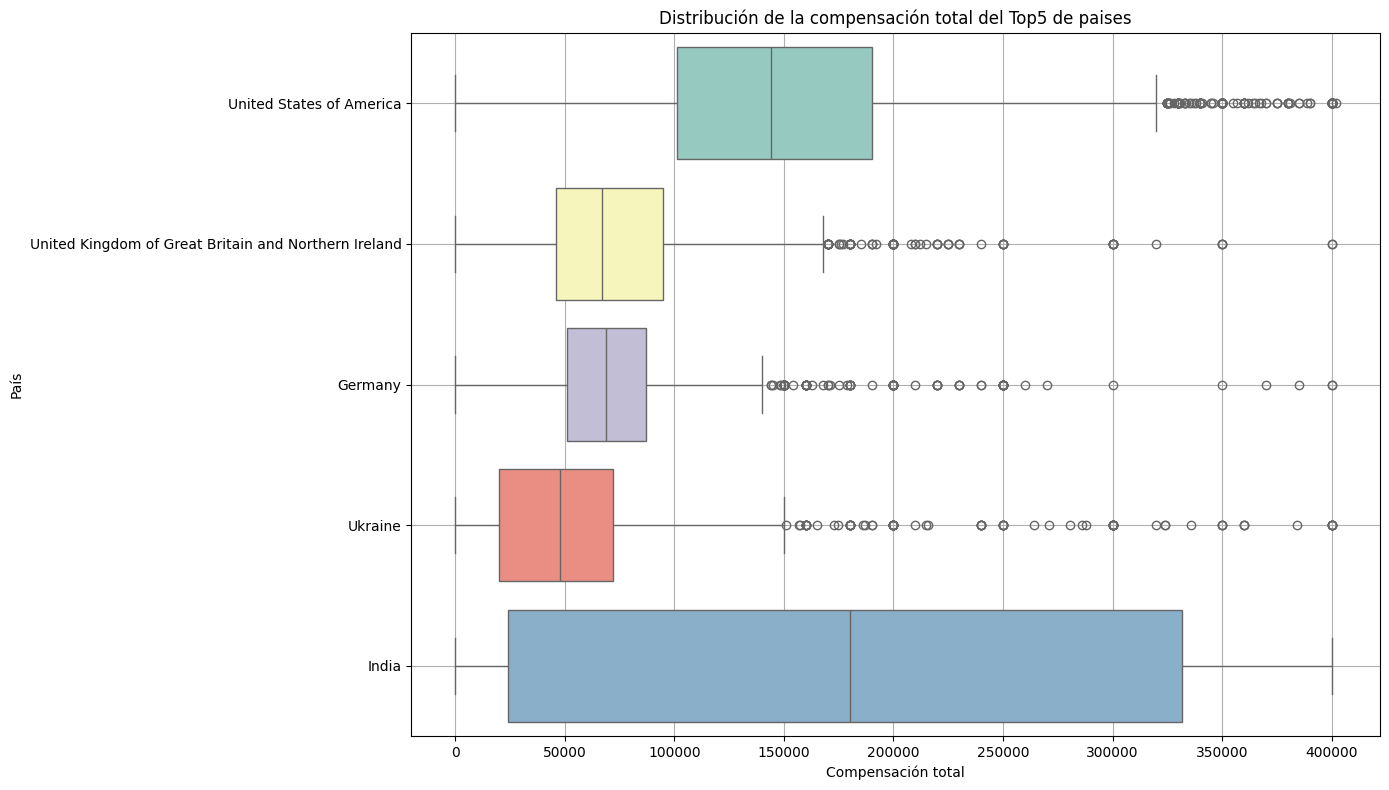

In [50]:
QUERY = """
SELECT Country, CompTotal FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

top5_countries = df['Country'].value_counts().head(5).index
df = df[df['Country'].isin(top5_countries)]

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]

plt.figure(figsize=(14, 8))
sns.boxplot(x="CompTotal", y="Country", data=new_df, palette="Set3")
plt.title("Distribución de la compensación total del Top5 de paises")
plt.xlabel("Compensación total")
plt.ylabel("País")
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_299/2311270334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CompTotal", y="Employment", data=new_df, palette="Set3")


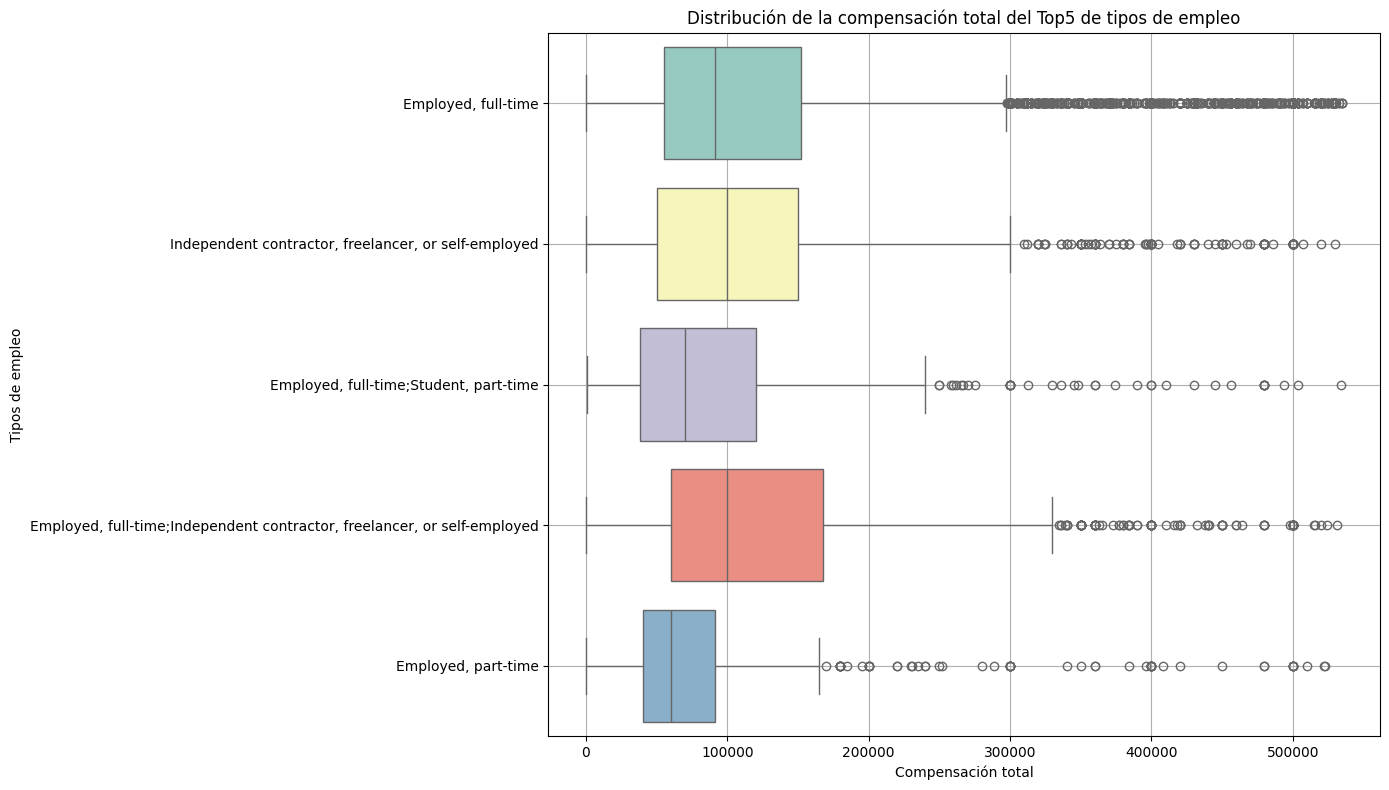

In [56]:
QUERY = """
SELECT Employment, CompTotal FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

top5_employments = df['Employment'].value_counts().head(5).index
df = df[df['Employment'].isin(top5_employments)]

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]

plt.figure(figsize=(14, 8))
sns.boxplot(x="CompTotal", y="Employment", data=new_df, palette="Set3")
plt.title("Distribución de la compensación total del Top5 de tipos de empleo")
plt.xlabel("Compensación total")
plt.ylabel("Tipos de empleo")
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_299/1865185276.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="YearsCodePro", y="JobSatPoints_6", data=df, palette="Set3")


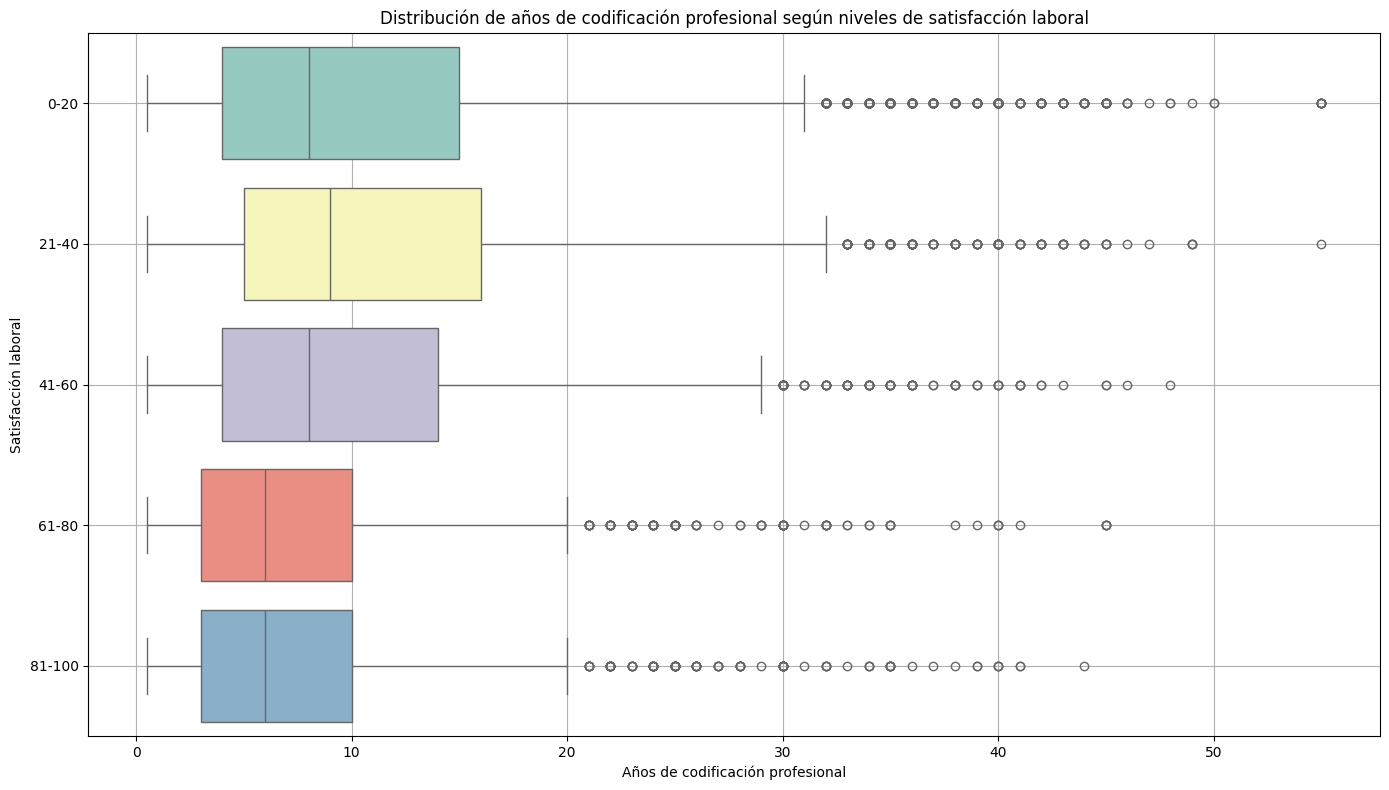

In [71]:
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df=pd.read_sql_query(QUERY,conn)

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df["JobSatPoints_6"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels, right=True, include_lowest=True)

df["YearsCodePro"] = df["YearsCodePro"].replace('Less than 1 year',0.5)
df["YearsCodePro"] = df["YearsCodePro"].replace('More than 50 years',55)
df["YearsCodePro"] = df["YearsCodePro"].astype(float)

plt.figure(figsize=(14, 8))
sns.boxplot(x="YearsCodePro", y="JobSatPoints_6", data=df, palette="Set3")
plt.title("Distribución de años de codificación profesional según niveles de satisfacción laboral")
plt.xlabel("Años de codificación profesional")
plt.ylabel("Satisfacción laboral")
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [72]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
